In [49]:
#importing important liberaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
# Load the Data.
def load_and_clean_data(file_path):
    try:
        # Load the dataset
        df = pd.read_csv("all_upwork_jobs_.csv")
    except FileNotFoundError:
        print(f"Error: The file {'all_upwork_jobs_.csv'} was not found. Please ensure the path is correct.")
        return None
df=pd.read_csv("all_upwork_jobs_.csv")

In [52]:
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [53]:
# It tells the number of rows and columns. Here 244828 are rows and 8 columns.
df.shape

(244828, 8)

In [54]:
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [55]:
df.tail()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France
244827,Creating a UGC Ad for Our Mobile Game,https://www.upwork.com/jobs/Creating-UGC-for-O...,2024-03-24 13:53:00+00:00,False,NaN,NaN,50.0,Israel


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [56]:
# Changing the datatype of column published_date from "object" to "datetime".
df["published_date"]=pd.to_datetime(df["published_date"])

In [57]:
df.info()

# Here the published_date column datatype is changed to "datetime".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   title           244827 non-null  object             
 1   link            244827 non-null  object             
 2   published_date  244828 non-null  datetime64[ns, UTC]
 3   is_hourly       244828 non-null  bool               
 4   hourly_low      102422 non-null  float64            
 5   hourly_high     98775 non-null   float64            
 6   budget          103891 non-null  float64            
 7   country         239751 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(3), object(3)
memory usage: 13.3+ MB


In [58]:
df.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [59]:
# Handle missing values

df['hourly_low']=df['hourly_low'].fillna(df['hourly_low'].median())
df['hourly_high']=df['hourly_high'].fillna(df['hourly_high'].median())
df['budget']=df['budget'].fillna(df['budget'].median())
df['country'].fillna('Unknown', inplace=True)

In [60]:
df.isnull().sum()

title             1
link              1
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hourly_low,244828.0,15.978773,11.789481,3.0,15.0,15.0,15.0,998.0
hourly_high,244828.0,34.829501,30.955729,3.0,30.0,30.0,30.0,999.0
budget,244828.0,444.342967,10254.421295,5.0,100.0,100.0,100.0,1000000.0


In [62]:
df.duplicated().sum()

0

In [63]:
df['hourly_avg'] = (df['hourly_low'] + df['hourly_high']) / 2
df['salary'] = np.where(df['is_hourly'], df['hourly_avg'], df['budget'])

In [64]:
# Create a single 'salary' column for analysis
df['salary'] = df['budget'].fillna(
(df['hourly_low'] + df['hourly_high']) / 2
) 

In [65]:
# Drop rows with no salary information for a cleaner analysis
df.dropna(subset=['salary'], inplace=True)
df.dropna(subset=['title'], inplace=True)

## Task 1

#### Correlation between Job Title Keywords and Offered Salaries

In [66]:
def analyze_job_market_trends(df):
    if df is None:
        print("Data is not available for analysis.")
        return

In [67]:
keyword_categories = {
        'Developer': ['developer', 'engineer', 'programmer', 'full stack'],
        'Analyst': ['analyst', 'data scientist', 'machine learning', 'ai'],
        'Manager': ['manager', 'director', 'lead'],
        'Marketing': ['marketing', 'seo', 'social media', 'advertising'],
        'Writer': ['writer', 'copywriter', 'editor']}

In [68]:
salary_data = []
for category, keywords in keyword_categories.items():
    # Create a boolean mask to find jobs containing any of the keywords
    mask = df['title'].str.contains('|'.join(keywords), case=False, na=False)
    category_df = df[mask]
if not category_df.empty:
    avg_salary = category_df['salary'].mean()
    salary_data.append({'Category': category, 'Average Salary': avg_salary})

In [69]:
salary_df = pd.DataFrame(salary_data).sort_values(by='Average Salary', ascending=False)
print(salary_df)
print("\n")

  Category  Average Salary
0   Writer      367.316055




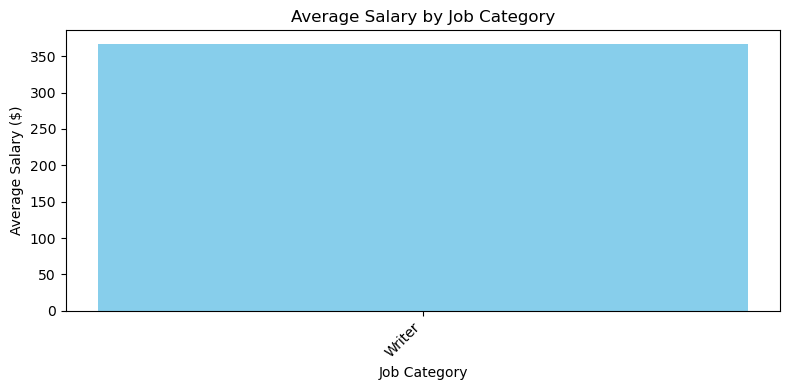

In [70]:
# Generate and save a bar chart visualization
plt.figure(figsize=(8, 4))
plt.bar(salary_df['Category'], salary_df['Average Salary'], color='skyblue')
plt.xlabel('Job Category')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Job Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Task 2 

#### Identify Emerging Job Categories based on Posting Frequency

In [71]:
df['month_year'] = df['published_date'].dt.to_period('M')

In [72]:
trend_data = {}
for category, keywords in keyword_categories.items():
    mask = df['title'].str.contains('|'.join(keywords), case=False, na=False)
    category_df = df[mask]
    trend_counts = category_df.groupby('month_year')['title'].count().reset_index()
    trend_counts.rename(columns={'title': category}, inplace=True)
    trend_data[category] = trend_counts

In [73]:
if trend_data:
    merged_trends = pd.DataFrame()
    for key, value in trend_data.items():
        if merged_trends.empty:
            merged_trends = value
        else:
            merged_trends = pd.merge(merged_trends, value, on='month_year', how='outer')
            merged_trends.fillna(0, inplace=True)
            merged_trends['month_year'] = merged_trends['month_year'].astype(str)
            print("Job posting frequency trends by month:")
            print(merged_trends)
            print("\n")

Job posting frequency trends by month:
  month_year  Developer  Analyst
0    2023-12        0.0        1
1    2024-01        7.0        6
2    2024-02     8249.0     9290
3    2024-03    11841.0    13074




ValueError: You are trying to merge on object and period[M] columns for key 'month_year'. If you wish to proceed you should use pd.concat

Saved a visualization of job trends to 'job_posting_trends.png'


Saved a visualization of job trends to 'job_posting_trends.png'




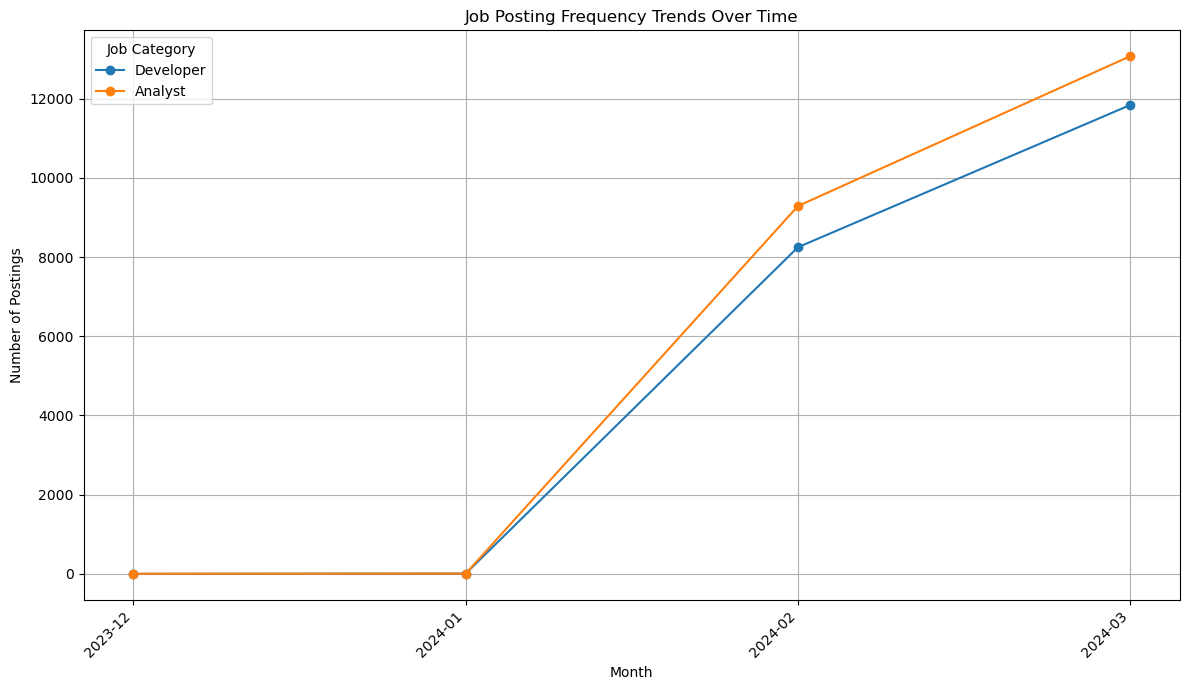

In [38]:
# Generate and save a line chart visualization
merged_trends.set_index('month_year', inplace=True)
plt.figure(figsize=(12, 7))
for column in merged_trends.columns:
        plt.plot(merged_trends.index, merged_trends[column], marker='o', label=column)
        plt.xlabel('Month')
        plt.ylabel('Number of Postings')
        plt.title('Job Posting Frequency Trends Over Time')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Job Category')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('job_posting_trends.png')
        print("Saved a visualization of job trends to 'job_posting_trends.png'")
        print("\n")

# Task 3

#### A Basic Predictive Model for Hourly Rates

In [74]:
def create_predictive_model(df):
    if df is None:
        return

In [75]:
# This is a simplified model to predict 'hourly_high' based on the job title.
hourly_df = df.dropna(subset=['hourly_high']).copy()

## Use TF-IDF to convert job titles into numerical features

In [76]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(hourly_df['title'])
y = hourly_df['hourly_high']

## Train Test Split

In [77]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Simple Linear Regressiom Model

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate the model

In [79]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error (MSE): {mse:.2f}")

Model Mean Squared Error (MSE): 874.73


## Demonstrate a prediction on a new, unseen title

In [80]:
sample_title = "Need a skilled Python Developer for a web project"
sample_vector = vectorizer.transform([sample_title])
predicted_rate = model.predict(sample_vector)[0]
print(f"Sample Prediction: The predicted high hourly rate for '{sample_title}' is ${predicted_rate:.2f}")

Sample Prediction: The predicted high hourly rate for 'Need a skilled Python Developer for a web project' is $35.24


In [81]:
if __name__ == "__main__":
    file_path = "all_upwork_jobs_.csv"
    jobs_df = load_and_clean_data(file_path)

    if jobs_df is not None:
        analyze_job_market_trends(jobs_df)
        create_predictive_model(jobs_df)
